## AI 13기 이수형 Section 1 Project

**다음 분기에는 어떤 게임을 설계해야 할까**

# 데이터 전처리 

**1. 데이터 불러오기**

In [84]:
import pandas as pd 

In [85]:
raw_dat=pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
raw_dat.drop('Unnamed: 0',inplace=True,axis=1)
raw_dat.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


Sales Column 에 있는 K 와 M 단위를 변형하는 과정 

In [86]:
raw_dat['NA_Sales']=raw_dat["NA_Sales"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
raw_dat['EU_Sales']=raw_dat["EU_Sales"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
raw_dat['JP_Sales']=raw_dat["JP_Sales"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)
raw_dat['Other_Sales']=raw_dat["Other_Sales"].replace({"K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(float)


데이터 타입 확인 및 결측치 제거 과정

In [87]:
raw_dat.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [88]:
raw_dat.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [89]:
raw_dat=raw_dat.dropna()
raw_dat.isna().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

전체적인 데이터 형식을 확인하다가 년도에 이상이 있다는것을 발견, 2020년까지의 데이터인것을 바탕으로 이상한 값들 수정

In [90]:
raw_dat.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,1.624100e+04,1.624100e+04,1.624100e+04,16241.000000
mean,1994.178437,4.592958e+03,2.113931e+03,1.229065e+03,457.531922
std,155.484265,1.227300e+05,5.303227e+04,4.514800e+04,10246.650851
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2007.000000,8.000000e-02,2.000000e-02,0.000000e+00,0.010000
75%,2010.000000,2.400000e-01,1.200000e-01,4.000000e-02,0.040000
max,2020.000000,9.630000e+06,2.930000e+06,3.150000e+06,590000.000000


In [91]:
def strange_year(i):
    if i<=20:
        return int(i+2000)
    elif 20<i<1500:
        return int(i+1900)
    else:
        return i

raw_dat['Year']=raw_dat['Year'].apply(strange_year)
raw_dat.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16241.000000,1.624100e+04,1.624100e+04,1.624100e+04,16241.000000
mean,2006.406748,4.592958e+03,2.113931e+03,1.229065e+03,457.531922
std,5.832087,1.227300e+05,5.303227e+04,4.514800e+04,10246.650851
min,1980.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2003.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2007.000000,8.000000e-02,2.000000e-02,0.000000e+00,0.010000
75%,2010.000000,2.400000e-01,1.200000e-01,4.000000e-02,0.040000
max,2020.000000,9.630000e+06,2.930000e+06,3.150000e+06,590000.000000


게임별 전체 판매량을 확인하기 위한 Total_Sales 컬럼 생성

In [92]:
raw_dat['Total_Sales']=raw_dat['NA_Sales']+raw_dat['EU_Sales']+raw_dat['JP_Sales']+raw_dat['Other_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# 반드시 들어가야하는 내용

**과제1. 지역에 따라서 선호하는 게임 장르가 다를까**

In [93]:
genre_nation=raw_dat[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
genre_nation

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,0.04,0.00,0.00,0.00
1,Action,0.17,0.00,0.00,0.01
2,Adventure,0.00,0.00,0.02,0.00
3,Misc,0.04,0.00,0.00,0.00
4,Platform,0.12,0.09,0.00,0.04
...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01
16594,Action,0.01,0.00,0.00,0.00
16595,Sports,0.44,0.19,0.03,0.13
16596,Action,0.05,0.05,0.25,0.03


지역에 따른 선호 장르만 조사하기때문에 장르와 지역별 판매량, 그리고 총 판매량 만을 이용하여 
새로운 Dataframe 생성

In [94]:
genre_nation['Total_Sales']=genre_nation['NA_Sales']+genre_nation['EU_Sales']+genre_nation['JP_Sales']+genre_nation['Other_Sales']
genre_nation


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,0.04,0.00,0.00,0.00,0.04
1,Action,0.17,0.00,0.00,0.01,0.18
2,Adventure,0.00,0.00,0.02,0.00,0.02
3,Misc,0.04,0.00,0.00,0.00,0.04
4,Platform,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...
16593,Platform,0.15,0.04,0.00,0.01,0.20
16594,Action,0.01,0.00,0.00,0.00,0.01
16595,Sports,0.44,0.19,0.03,0.13,0.79
16596,Action,0.05,0.05,0.25,0.03,0.38


장르별 판매량 을 확인하는 작업

In [95]:
Total_Genre=genre_nation.groupby('Genre').Total_Sales.sum()
NA_Genre=genre_nation.groupby('Genre').NA_Sales.sum()
EU_Genre=genre_nation.groupby('Genre').EU_Sales.sum()
JP_Genre=genre_nation.groupby('Genre').JP_Sales.sum()
Other_Genre=genre_nation.groupby('Genre').Other_Sales.sum()

이후 Dataframe 으로 변경한 이후 merge를 통해 장르별 판매량 정리 

In [96]:
Total_Genre_df=Total_Genre.to_frame()
NA_Genre_df=NA_Genre.to_frame()
EU_Genre_df=EU_Genre.to_frame()
JP_Genre_df=JP_Genre.to_frame()
Other_Genre_df=Other_Genre.to_frame()

In [97]:
from functools import reduce

merge_list=[Total_Genre_df,NA_Genre_df,EU_Genre_df,JP_Genre_df,Other_Genre_df]
Final_df=reduce(lambda left,right: pd.merge(left,right,on='Genre'),merge_list)
Final_df

,Total_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,31281681.70,21470837.28,7030506.61,1440155.16,1340182.65
Adventure,1310232.71,760101.03,190063.47,80051.79,280016.42
Fighting,4620438.92,1360218.99,1420098.48,1340085.80,500035.65
Misc,7790771.91,4090390.64,2820205.33,420103.76,460072.18
Platform,14110813.88,5220440.16,7620193.01,790129.74,480050.97
Puzzle,540240.19,80121.50,410050.06,56.24,50012.39
Racing,14690707.86,11950342.75,2040232.98,280056.04,420076.09
Role-Playing,16610884.90,1600317.16,1610181.48,11780331.15,1620055.11
Shooter,19351005.40,12430562.05,6120304.11,60038.12,740101.12


In [98]:
Graph_df=Final_df.drop('Total_Sales',axis=1)

**장르별 지역에 따른 판매량 시각화**

Text(0, 0.5, 'Total Sales')

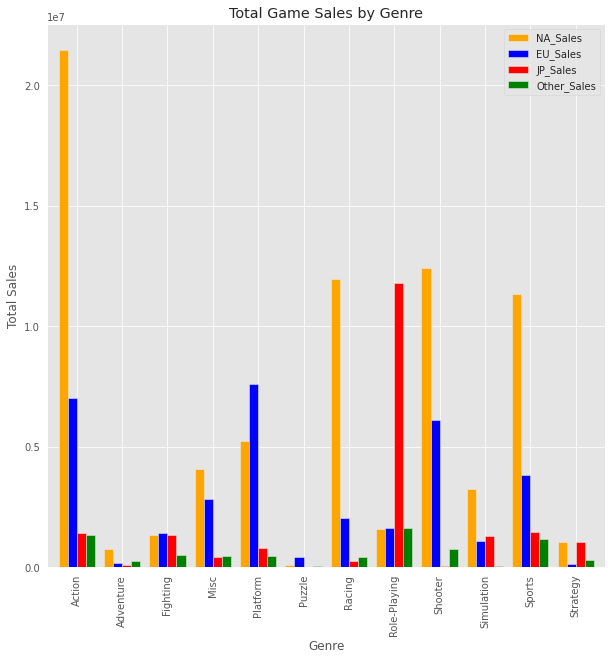

In [99]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

Graph_df.plot(kind='bar',figsize=(10,10),width=0.8,color=['orange','blue','red','green'])
plt.title('Total Game Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')

**과제 2. 연도별 게임의 트렌드가 있을까**

연도, 장르, 총판매량 으로 이루어진 Dataframe 생성

In [100]:
df_ytrends=raw_dat[['Year','Genre','Total_Sales']]
df_ytrends

,Year,Genre,Total_Sales
0,2008.0,Action,0.04
1,2009.0,Action,0.18
2,2010.0,Adventure,0.02
3,2010.0,Misc,0.04
4,2010.0,Platform,0.25
...,...,...,...
16593,2006.0,Platform,0.20
16594,2005.0,Action,0.01
16595,2015.0,Sports,0.79
16596,2013.0,Action,0.38


연도별로 가장 많은 총 판매량 을 가진 게임들의 장르를 표시하는 Dataframe 생성

In [101]:
grouped_df=df_ytrends.groupby(['Year','Genre']).sum().reset_index()
grouped_df

,Year,Genre,Total_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.70
3,1980.0,Shooter,7.07
4,1981.0,Action,110014.68
...,...,...,...
383,2016.0,Sports,280014.35
384,2016.0,Strategy,0.52
385,2017.0,Action,0.01
386,2017.0,Role-Playing,0.04


In [102]:
a=grouped_df.groupby('Year')['Total_Sales'].transform('max')==grouped_df['Total_Sales']
grouped_df_final=grouped_df[a].reset_index()
grouped_df_final

,index,Year,Genre,Total_Sales
0,3,1980.0,Shooter,7.07
1,4,1981.0,Action,110014.68
2,14,1982.0,Puzzle,10.04
3,21,1983.0,Platform,6.93
4,30,1984.0,Shooter,31.10
5,34,1985.0,Platform,460042.71
6,39,1986.0,Action,13.74
7,47,1987.0,Fighting,5.42
8,53,1988.0,Platform,190027.54
9,63,1989.0,Puzzle,60037.69


연도별 가장 인기가 많았던 게임 장르 시각화

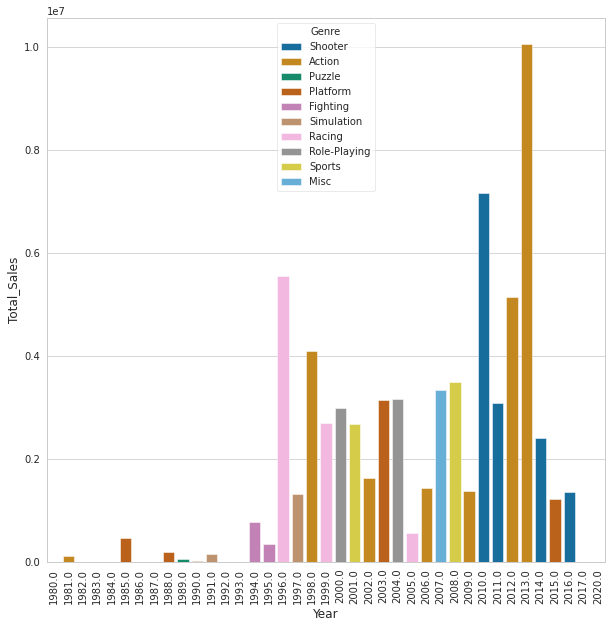

In [103]:
import seaborn as sns

sns.set_style('whitegrid')
fig=plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
aa=sns.barplot(x='Year',y='Total_Sales',hue='Genre',data=grouped_df_final,dodge=False,palette='colorblind')

**과제 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

이름 연도 장르 출판회사 총판매량 Dataframe 생성

In [104]:
df_top_sales=raw_dat[['Name','Year','Genre','Publisher','Total_Sales']]
df_top_sales

,Name,Year,Genre,Publisher,Total_Sales
0,Candace Kane's Candy Factory,2008.0,Action,Destineer,0.04
1,The Munchables,2009.0,Action,Namco Bandai Games,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,2010.0,Adventure,Alchemist,0.02
3,Deal or No Deal: Special Edition,2010.0,Misc,Zoo Games,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,2010.0,Platform,D3Publisher,0.25
...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,2006.0,Platform,Vivendi Games,0.20
16594,Rainbow Islands: Revolution,2005.0,Action,Rising Star Games,0.01
16595,NBA 2K16,2015.0,Sports,Take-Two Interactive,0.79
16596,Toukiden: The Age of Demons,2013.0,Action,Tecmo Koei,0.38


가장 많이 팔린 게임 20개만 따로 추출

In [105]:
df_top_sales=df_top_sales.sort_values('Total_Sales',ascending=False)[:20]
df_top_sales.set_index('Name')

,Year,Genre,Publisher,Total_Sales
Name,,,,
Grand Theft Auto V,2013.0,Action,Take-Two Interactive,9630006.75
Halo: Reach,2010.0,Shooter,Microsoft Game Studios,7030002.84
Mario Kart 64,1996.0,Racing,Nintendo,5550004.32
The Legend of Zelda: Ocarina of Time,1998.0,Action,Nintendo,4100003.50
Pokemon FireRed/Pokemon LeafGreen,2004.0,Role-Playing,Nintendo,3150007.34
Pokémon Yellow: Special Pikachu Edition,1998.0,Role-Playing,Nintendo,3120011.52
Super Mario Bros. 3,2003.0,Platform,Nintendo,2930002.28
FIFA 14,2013.0,Sports,Electronic Arts,2930001.39
Super Mario 64,1996.0,Platform,Nintendo,2850009.05


게임별로 가장 많이 팔린순위별로 시각화

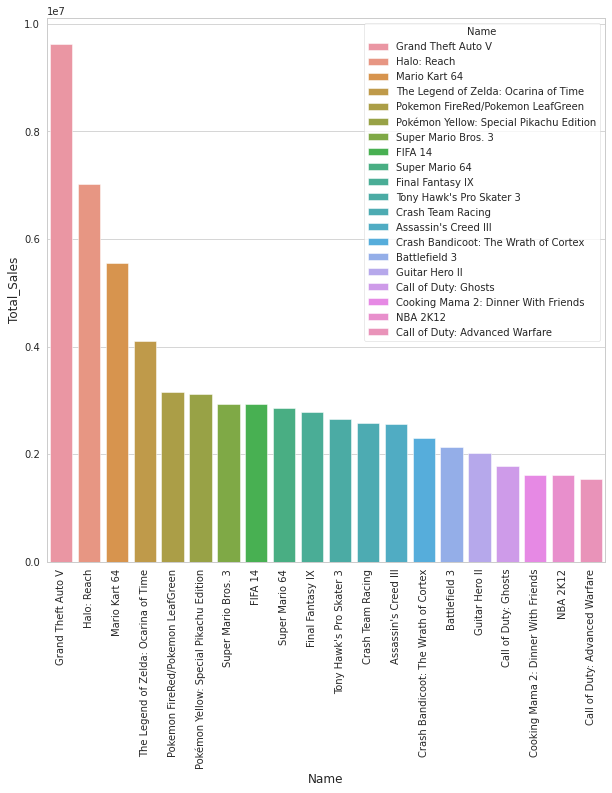

In [106]:
top_sale_name=df_top_sales['Name']
top_sale_total=df_top_sales['Total_Sales']

fig=plt.figure(figsize=(10,10))
plt.xticks(rotation=90)

a=sns.barplot(x=top_sale_name,y=top_sale_total,hue=top_sale_name,data=df_top_sales,dodge=False)

가장 판매량이 높았던 게임 Grand Theft Auto V 에 대한 분석

In [107]:
condition=((raw_dat['Name']=='Grand Theft Auto V'))
df_gta=raw_dat[condition]
df_gta

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2008,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
3483,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
10834,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630000.00,5.31,0.06,1.38,9630006.75
16575,Grand Theft Auto V,PC,2015.0,Action,Take-Two Interactive,0.36,0.64,0.00,0.08,1.08


여러가지 Platform 에 다양하게 출시하여 가장 많은 판매량을 기록한 Platform 시각화로 확인

[(0.0, 30.0)]

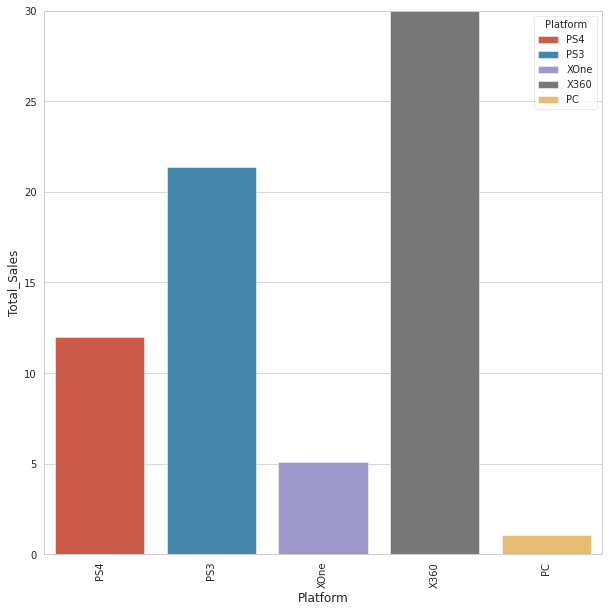

In [108]:
gta_platform=df_gta['Platform']
gta_sale_total=df_gta['Total_Sales']

fig=plt.figure(figsize=(10,10))
plt.xticks(rotation=90)

aaa=sns.barplot(x=gta_platform,y=gta_sale_total,hue=gta_platform,data=df_gta,dodge=False)
aaa.set(ylim=(0,30))

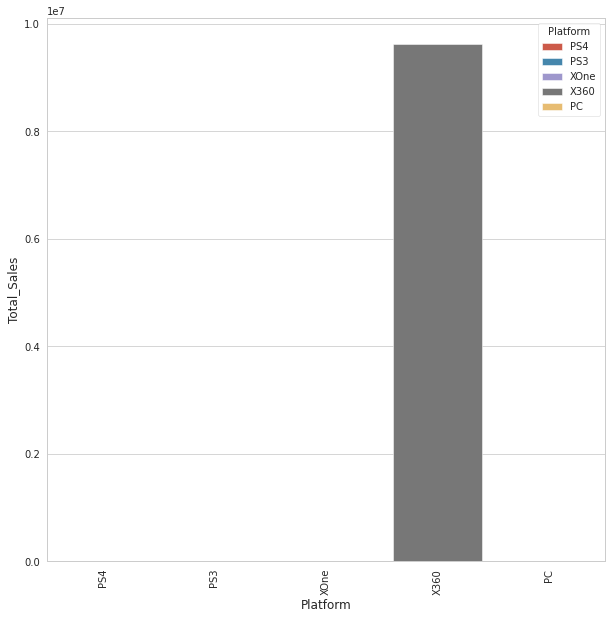

In [109]:
gta_platform=df_gta['Platform']
gta_sale_total=df_gta['Total_Sales']

fig=plt.figure(figsize=(10,10))
plt.xticks(rotation=90)

aaa=sns.barplot(x=gta_platform,y=gta_sale_total,hue=gta_platform,data=df_gta,dodge=False)


지역별로 어디에서 가장 많이 Grand Theft Auto V 가 판매되었는지 확인

In [110]:
gta_region=[]
gta_na=df_gta['NA_Sales'].sum()
gta_eu=df_gta['EU_Sales'].sum()
gta_jp=df_gta['JP_Sales'].sum()
gta_etc=df_gta['Other_Sales'].sum()
gta_region.append(gta_na)
gta_region.append(gta_eu)
gta_region.append(gta_jp)
gta_region.append(gta_etc)
gta_region_name=['North America','Europe','Japan','Other']
df_gta_region_sales=pd.DataFrame(gta_region,columns=['Sales'])
df_gta_region_names=pd.DataFrame(gta_region_name,columns=['Regions'])
df_gta_region=pd.concat([df_gta_region_names,df_gta_region_sales],axis=1)
df_gta_region

,Regions,Sales
0,North America,9630013.83
1,Europe,23.04
2,Japan,1.39
3,Other,8.03


결과 시각화 확인

[(0.0, 30.0)]

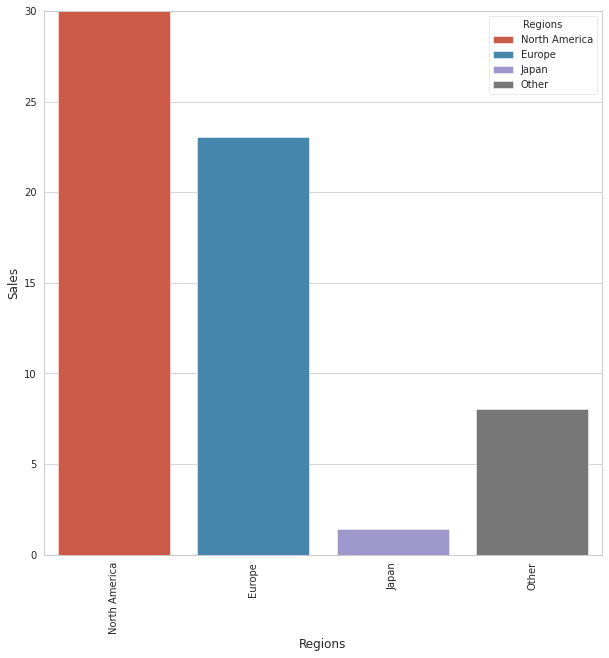

In [111]:
gta_regions=df_gta_region['Regions']
gta_sales=df_gta_region['Sales']

fig=plt.figure(figsize=(10,10))
plt.xticks(rotation=90)

aba=sns.barplot(x=gta_regions,y=gta_sales,hue=gta_regions,data=df_gta_region,dodge=False)
aba.set(ylim=(0,30))

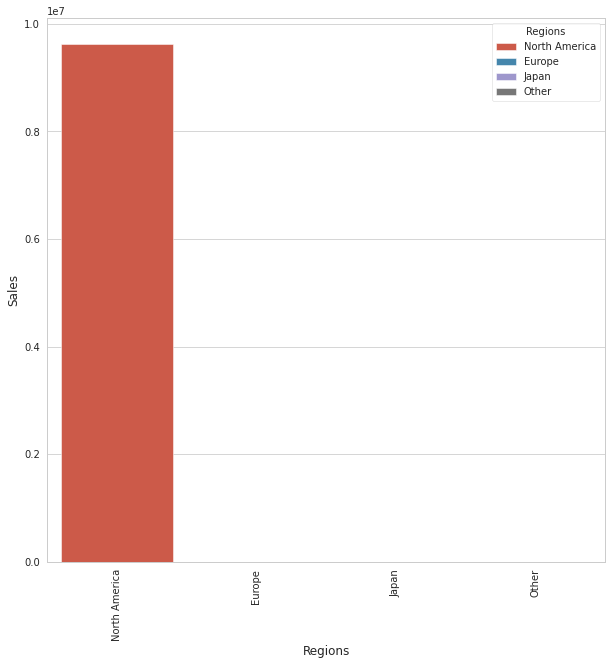

In [112]:
gta_regions=df_gta_region['Regions']
gta_sales=df_gta_region['Sales']

fig=plt.figure(figsize=(10,10))
plt.xticks(rotation=90)

aba=sns.barplot(x=gta_regions,y=gta_sales,hue=gta_regions,data=df_gta_region,dodge=False)


총 판매량 2등 게임(Halo: Reach)과 3등게임 (Mario Kart 64)도 데이터만 확인

In [113]:
condition=((raw_dat['Name']=='Halo: Reach'))
df_gta=raw_dat[condition]
df_gta

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
12600,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7030000.0,1.98,0.08,0.78,7030002.84


In [114]:
condition=((raw_dat['Name']=='Mario Kart 64'))
df_gta=raw_dat[condition]
df_gta

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5550000.0,1.94,2.23,0.15,5550004.32


가장 많이 팔린 게임들의 공통점을 찾아보기 위한 과정 

In [115]:
df_why_top=raw_dat[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
df_why_top=df_why_top.sort_values('Total_Sales',ascending=False)[:100]
df_why_top.set_index('Name')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,,,,,
Grand Theft Auto V,9630000.00,5.31,0.06,1.38,9630006.75
Halo: Reach,7030000.00,1.98,0.08,0.78,7030002.84
Mario Kart 64,5550000.00,1.94,2.23,0.15,5550004.32
The Legend of Zelda: Ocarina of Time,4100000.00,1.89,1.45,0.16,4100003.50
Pokemon FireRed/Pokemon LeafGreen,4.34,2.65,3150000.00,0.35,3150007.34
...,...,...,...,...,...
FIFA 17,280000.00,3.75,0.06,0.69,280004.50
DmC: Devil May Cry,0.24,280000.00,0.19,0.12,280000.55
Hasbro Family Game Night 3,0.47,280000.00,0.00,0.07,280000.54


북미에서의 판매량이 중요 한가 확인 하는 과정 


이에따른 북미가 아닌 지역의 판매량을 Non_NA_Sales 로 통합

In [116]:
df_why_top['Non_NA_Sales']=df_why_top['EU_Sales']+df_why_top['JP_Sales']+df_why_top['Other_Sales']
df_why_top

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Non_NA_Sales
10913,Grand Theft Auto V,9630000.00,5.31,0.06,1.38,9630006.75,6.75
12600,Halo: Reach,7030000.00,1.98,0.08,0.78,7030002.84,2.84
577,Mario Kart 64,5550000.00,1.94,2.23,0.15,5550004.32,4.32
1964,The Legend of Zelda: Ocarina of Time,4100000.00,1.89,1.45,0.16,4100003.50,3.50
1810,Pokemon FireRed/Pokemon LeafGreen,4.34,2.65,3150000.00,0.35,3150007.34,3150003.00
...,...,...,...,...,...,...,...
15481,FIFA 17,280000.00,3.75,0.06,0.69,280004.50,4.50
9745,DmC: Devil May Cry,0.24,280000.00,0.19,0.12,280000.55,280000.31
2184,Hasbro Family Game Night 3,0.47,280000.00,0.00,0.07,280000.54,280000.07
15430,Harry Potter and the Half-Blood Prince,280000.00,0.40,0.00,0.09,280000.49,0.49


In [117]:
df_na_vs_other=df_why_top[['Name','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Non_NA_Sales']]
df_na_vs_other=df_na_vs_other.set_index('Name')
df_na_vs_other

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Non_NA_Sales
Name,,,,,
Grand Theft Auto V,9630000.00,5.31,0.06,1.38,6.75
Halo: Reach,7030000.00,1.98,0.08,0.78,2.84
Mario Kart 64,5550000.00,1.94,2.23,0.15,4.32
The Legend of Zelda: Ocarina of Time,4100000.00,1.89,1.45,0.16,3.50
Pokemon FireRed/Pokemon LeafGreen,4.34,2.65,3150000.00,0.35,3150003.00
...,...,...,...,...,...
FIFA 17,280000.00,3.75,0.06,0.69,4.50
DmC: Devil May Cry,0.24,280000.00,0.19,0.12,280000.31
Hasbro Family Game Night 3,0.47,280000.00,0.00,0.07,280000.07


2-Sameple One-Tailed test 를 통한 가설 검증

In [118]:
#Na sales > non-NA Sales
import numpy as np
from scipy import stats
!pip install scipy --upgrade
Na=df_na_vs_other['NA_Sales']
NonNa=df_na_vs_other['Non_NA_Sales']

pv1=stats.ttest_ind(Na,NonNa,alternative='greater').pvalue
pv2=stats.ttest_ind(Na,NonNa,alternative='less').pvalue

if pv1<0.05:
    ans='NA has a much bigger pie'
elif pv2<0.05:
    ans='NA has a smaller pie'
else:
    ans='Statistics are not important'

print(ans)
print(pv1)

Statistics are not important
0.08954344658506219


북미 판매량과 다른 나라들의 판매량을 개별적으로 확인하는 과정

In [119]:
#Na sales > EU sales
Na=df_na_vs_other['NA_Sales']
Eu=df_na_vs_other['EU_Sales']

pv1=stats.ttest_ind(Na,Eu,alternative='greater').pvalue
pv2=stats.ttest_ind(Na,Eu,alternative='less').pvalue

if pv1<0.05:
    ans='NA has a much bigger pie'
elif pv2<0.05:
    ans='NA has a smaller pie'
else:
    ans='Statistics are not important'

ans

'NA has a much bigger pie'

In [120]:
#Na sales> JP sales
Na=df_na_vs_other['NA_Sales']
Jp=df_na_vs_other['JP_Sales']

pv1=stats.ttest_ind(Na,Jp,alternative='greater').pvalue
pv2=stats.ttest_ind(Na,Jp,alternative='less').pvalue

if pv1<0.05:
    ans='NA has a much bigger pie'
elif pv2<0.05:
    ans='NA has a smaller pie'
else:
    ans='Statistics are not important'

ans

'NA has a much bigger pie'

In [121]:
#Na sales > other sales
Na=df_na_vs_other['NA_Sales']
Other=df_na_vs_other['Other_Sales']

pv1=stats.ttest_ind(Na,Other,alternative='greater').pvalue
pv2=stats.ttest_ind(Na,Other,alternative='less').pvalue

if pv1<0.05:
    ans='NA has a much bigger pie'
elif pv2<0.05:
    ans='NA has a smaller pie'
else:
    ans='Statistics are not important'

ans

'NA has a much bigger pie'

# **그래서 다음 분기에 어떤 게임을 설계해야 할까**

**게임 설계에 중요하다고 생각하는 요소들은 뭐가 있을까?**


*   어느 지역에 출시를 해야하는가
*   어떤 장르의 게임을 만들어야 하는가 
*   어떤 플랫폼을 이용하여 출시하는가

이렇게 3가지가 중요하다고 생각합니다

**어느 지역에 출시를 해야하는가**

-> 과제 3번(출고량이 높은 게임에 대한 분석) 을 통해서 NA 지역의 판매량이 다른 지역들보다 월등히 높다는 것을 확인 할 수 있다. 

**어떤 장르의 게임을 만들어야 하는가**

->과제 1번(지역에 따라서 선호하는 게임 장르가 다를까)을 통해서 지역이 정해졌으면 가장 성과가 높은 장르를 만드는것이 좋을것이다. 

**어떤 플랫폼을 이용하여 출시하는가**

-> 플랫폼별 판매량을 확인 해야한다

장르는 앞서 분석한 것을 토대로 Action 게임을 만드는게 가장 유의하다 판단 할 수 있다. 

In [122]:
df_NA_genre=Final_df[['NA_Sales']]
df_NA_genre=df_NA_genre.sort_values('NA_Sales',ascending=False)
df_NA_genre

,NA_Sales
Genre,
Action,21470837.28
Shooter,12430562.05
Racing,11950342.75
Sports,11340655.92
Platform,5220440.16
Misc,4090390.64
Simulation,3240178.19
Role-Playing,1600317.16
Fighting,1360218.99


지역은 북미 기준으로 플랫폼별 판매량 확인




In [123]:
df_best_choice=raw_dat[['Name','Platform','Year','Genre','NA_Sales']]
df_best_choice=df_best_choice.sort_values('NA_Sales',ascending=False)[:8000]
df_best_choice.set_index('Name',inplace=True)
df_best_choice

,Platform,Year,Genre,NA_Sales
Name,,,,
Grand Theft Auto V,X360,2013.0,Action,9630000.00
Halo: Reach,X360,2010.0,Shooter,7030000.00
Mario Kart 64,N64,1996.0,Racing,5550000.00
The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,4100000.00
Super Mario Bros. 3,GBA,2003.0,Platform,2930000.00
...,...,...,...,...
Jake Power: Fireman,DS,2008.0,Adventure,0.08
Disney's Donald Duck: Goin' Quackers,PS,2000.0,Platform,0.08
Grand Theft Auto: San Andreas,X360,2008.0,Action,0.08


다음 분기 게임을 계획하기 때문에 연도는 2000년도 이후 + Action 게임 한정으로만 확인

In [124]:
condition=((df_best_choice['Year']>2000)&(df_best_choice['Genre']=='Action'))
df_2000_best_choice=df_best_choice[condition]
df_2000_best_choice

,Platform,Year,Genre,NA_Sales
Name,,,,
Grand Theft Auto V,X360,2013.0,Action,9630000.00
Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,1230000.00
Harry Potter and the Chamber of Secrets,GBA,2002.0,Action,1210000.00
LEGO Star Wars II: The Original Trilogy,DS,2006.0,Action,960000.00
WWE '13,X360,2012.0,Action,720000.00
...,...,...,...,...
Batman: Arkham Knight,PC,2015.0,Action,0.08
Dino Crisis 3,XB,2003.0,Action,0.08
Project: Snowblind,XB,2005.0,Action,0.08


출시한 플랫폼들을 확인 후 그룹 별로 묶어 가장 유의미할 플랫폼 사용

In [125]:
df_2000_best_choice['Platform'].unique()

array(['X360', 'Wii', 'GBA', 'DS', 'PS2', 'PS4', 'GC', 'PSP', 'PS3', 'XB',
       'XOne', '3DS', 'PS', 'PC', 'GB', 'WiiU', 'PSV', 'N64'],
      dtype=object)

Xbox 플랫폼

In [126]:
condition1=((df_2000_best_choice['Platform']=='X360')|(df_2000_best_choice['Platform']=='XOne')|(df_2000_best_choice['Platform']=='XB'))
df_xbox=df_2000_best_choice[condition1]
df_xbox

,Platform,Year,Genre,NA_Sales
Name,,,,
Grand Theft Auto V,X360,2013.0,Action,9630000.00
WWE '13,X360,2012.0,Action,720000.00
Medal of Honor: Warfighter,X360,2012.0,Action,580000.00
Overlord II,X360,2009.0,Action,150000.00
Gladiator: Sword of Vengeance,XB,2003.0,Action,40000.00
...,...,...,...,...
Destroy All Humans! Path of the Furon,X360,2008.0,Action,0.08
Dino Crisis 3,XB,2003.0,Action,0.08
Project: Snowblind,XB,2005.0,Action,0.08


Playstation 플랫폼

In [127]:
condition2=((df_2000_best_choice['Platform']=='PS')|(df_2000_best_choice['Platform']=='PS2')|(df_2000_best_choice['Platform']=='PS3')|(df_2000_best_choice['Platform']=='PS4'))
df_ps=df_2000_best_choice[condition2]
df_ps

,Platform,Year,Genre,NA_Sales
Name,,,,
Spider-Man: Friend or Foe,PS2,2007.0,Action,310000.00
LEGO Dimensions,PS4,2015.0,Action,220000.00
Dynasty Warriors 3: Xtreme Legends,PS2,2002.0,Action,130000.00
Resident Evil: Revelations 2,PS3,2015.0,Action,60000.00
Song of the Deep,PS4,2016.0,Action,50000.00
...,...,...,...,...
Mary-Kate and Ashley: Crush Course,PS,2001.0,Action,0.08
Samurai Warriors 4,PS4,2014.0,Action,0.08
Mary-Kate and Ashley: Winners Circle,PS,2001.0,Action,0.08


Nintendo 플랫폼

In [128]:
condition3=((df_2000_best_choice['Platform']=='GC')|(df_2000_best_choice['Platform']=='Wii'))
df_nin=df_2000_best_choice[condition3]
df_nin

,Platform,Year,Genre,NA_Sales
Name,,,,
Star Wars The Clone Wars: Lightsaber Duels,Wii,2008.0,Action,1230000.00
Harry Potter and the Half-Blood Prince,Wii,2009.0,Action,280000.00
Teenage Mutant Ninja Turtles 2: Battle Nexus,GC,2004.0,Action,150000.00
The Adventures of Tintin: The Game,Wii,2011.0,Action,130000.00
Curious George,GC,2006.0,Action,110000.00
...,...,...,...,...
Barnyard,GC,2006.0,Action,0.09
The Scorpion King: Rise of the Akkadian,GC,2002.0,Action,0.08
America's Next Top Model,Wii,2010.0,Action,0.08


휴대용 플랫폼

In [129]:
condition4=((df_2000_best_choice['Platform']=='PSV')|(df_2000_best_choice['Platform']=='PSP')|(df_2000_best_choice['Platform']=='GBA')|(df_2000_best_choice['Platform']=='3DS'))
df_port=df_2000_best_choice[condition4]
df_port

,Platform,Year,Genre,NA_Sales
Name,,,,
Harry Potter and the Chamber of Secrets,GBA,2002.0,Action,1210000.00
Star Wars: Lethal Alliance,PSP,2006.0,Action,110000.00
CT Special Forces,GBA,2002.0,Action,20000.00
"Crouching Tiger, Hidden Dragon",GBA,2003.0,Action,20000.00
Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,2.90
...,...,...,...,...
Pac-Man World 2,GBA,2005.0,Action,0.08
LEGO Knights' Kingdom,GBA,2004.0,Action,0.08
XXX,GBA,2002.0,Action,0.08


개인 컴퓨터 플랫폼

In [130]:
condition5=((df_2000_best_choice['Platform']=='PC'))
df_pc=df_2000_best_choice[condition5]
df_pc

,Platform,Year,Genre,NA_Sales
Name,,,,
Guild Wars 2,PC,2012.0,Action,0.95
Grand Theft Auto V,PC,2015.0,Action,0.36
Assassin's Creed III,PC,2012.0,Action,0.28
Dishonored,PC,2012.0,Action,0.26
The Witcher 2: Assassins of Kings,PC,2011.0,Action,0.25
Dragon Age II,PC,2011.0,Action,0.23
Assassin's Creed IV: Black Flag,PC,2013.0,Action,0.22
NBA 2K11,PC,2010.0,Action,0.18
Mafia II,PC,2010.0,Action,0.17


플랫폼의 선택이 판매량에 유의미한 차이를 보이는지 Two-sample one tailed t-test 를 통해 확인

In [131]:
#Platforms does not matter in sales

a=df_xbox['NA_Sales']
b=df_ps['NA_Sales']
c=df_nin['NA_Sales']
d=df_port['NA_Sales']
e=df_pc['NA_Sales']


In [132]:
#ab
pv1=stats.ttest_ind(a,b,alternative='greater').pvalue
pv2=stats.ttest_ind(a,b,alternative='less').pvalue

if pv1<0.05:
    ans='Xbox has a higher average sale '
elif pv2<0.05:
    ans='Playstation has a higher average sale'
else:
    ans='There is no meaningful difference'

ans

'There is no meaningful difference'

In [133]:
#ac
pv1=stats.ttest_ind(a,c,alternative='greater').pvalue
pv2=stats.ttest_ind(a,c,alternative='less').pvalue

if pv1<0.05:
    ans='Xbox has a higher average sale '
elif pv2<0.05:
    ans='Nintendo has a higher average sale'
else:
    ans='There is no meaningful difference'

ans

'There is no meaningful difference'

In [134]:
#ad
pv1=stats.ttest_ind(a,d,alternative='greater').pvalue
pv2=stats.ttest_ind(a,d,alternative='less').pvalue

if pv1<0.05:
    ans='Xbox has a higher average sale '
elif pv2<0.05:
    ans='Portable has a higher average sale'
else:
    ans='There is no meaningful difference'

ans

'There is no meaningful difference'

In [135]:
#ae
pv1=stats.ttest_ind(a,e,alternative='greater').pvalue
pv2=stats.ttest_ind(a,e,alternative='less').pvalue

if pv1<0.05:
    ans='Xbox has a higher average sale '
elif pv2<0.05:
    ans='Personal Computer has a higher average sale'
else:
    ans='There is no meaningful difference'

ans

'There is no meaningful difference'

In [136]:
#bc
pv1=stats.ttest_ind(b,c,alternative='greater').pvalue
pv2=stats.ttest_ind(b,c,alternative='less').pvalue

if pv1<0.05:
    ans='Playstation has a higher average sale '
elif pv2<0.05:
    ans='Nintendo has a higher average sale'
else:
    ans='There is no meaningful difference'

ans

'Nintendo has a higher average sale'

In [137]:
#bd
pv1=stats.ttest_ind(b,d,alternative='greater').pvalue
pv2=stats.ttest_ind(b,d,alternative='less').pvalue

if pv1<0.05:
    ans='Playstation has a higher average sale '
elif pv2<0.05:
    ans='Portable has a higher average sale'
else:
    ans='There is no meaningful difference'

ans

'There is no meaningful difference'

In [138]:
#be
pv1=stats.ttest_ind(b,e,alternative='greater').pvalue
pv2=stats.ttest_ind(b,e,alternative='less').pvalue

if pv1<0.05:
    ans='Playstation has a higher average sale '
elif pv2<0.05:
    ans='Personal Computer has a higher average sale'
else:
    ans='There is no meaningful difference'

ans

'There is no meaningful difference'

In [139]:
#cd
pv1=stats.ttest_ind(c,d,alternative='greater').pvalue
pv2=stats.ttest_ind(c,d,alternative='less').pvalue

if pv1<0.05:
    ans='Nintendo has a higher average sale '
elif pv2<0.05:
    ans='Portable has a higher average sale'
else:
    ans='There is no meaningful difference'

ans

'There is no meaningful difference'

In [140]:
#ce
pv1=stats.ttest_ind(c,e,alternative='greater').pvalue
pv2=stats.ttest_ind(c,e,alternative='less').pvalue

if pv1<0.05:
    ans='Nintendo has a higher average sale '
elif pv2<0.05:
    ans='Personal Computer has a higher average sale'
else:
    ans='There is no meaningful difference'

ans

'There is no meaningful difference'

**결과적으로 Playstation 과 Nintendo 사이에서만 Nintendo가 우세할뿐
대체적으로는 큰 차이가 없다**

# 결론

지역별 게임 선호도 조사를 통해 어느 지역에서 어떤 장르의 게임들이 좋은 성과를 보여주는지 확인 할 수 있었다. 

연도별 게임의 트랜드 분석을 통해 Action 게임과 Shooter 게임들의 강세를 확인 
하였다. 

출고량이 높은 게임을 분석하면서 어떤 지역을 타겟을 삼고 게임을 출시 해야하는지 판단 할 수 있었다.

플랫폼 분석을 통해 어떠한 플랫폼을 이용한 게임을 만들어야 할지 확인 할 수 있었다. 

**결과적으로 북미 지역에서 액션게임을 어떠한 플랫폼을 사용하던 상관없이 계획하는것이 가장 성공하기 쉽다 라고 판단 할 수 있다.**